In [71]:
import pandas as pd

df1=pd.read_csv('../data/model_analysis/model_metrics.csv', index_col=None)
df2=pd.read_csv('../data/model_analysis/model_metrics2.csv', index_col=None)
df3=pd.read_csv('../data/model_analysis/rf_finetune.csv', index_col=None)
df4=pd.read_csv('../data/model_analysis/thr_segment.csv', index_col=None)
df5=pd.read_csv('../data/model_analysis/alex_pmaps2.csv', index_col=None)
df6=pd.read_csv('../data/model_metrics3.csv', index_col=None)
df7=pd.read_csv('../data/model_analysis/extra_check_final_model.csv', index_col=None)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)


In [72]:
df['model_type'] = 'unet'
df.loc[df['model_name'].str.contains('Alex_pmaps'), 'model_type'] = 'alex_model'
df.loc[df['model_name'].str.contains('rf_finetune'), 'model_type'] = 'RF_finetune'
df.loc[df['model_name'].str.contains('thresholding'), 'model_type'] = 'baseline'
df.loc[df['model_name'].isin(df6['model_name'].unique()), 'model_type'] = 'eq-scale'
df.loc[df['model_name'].isin(df7['model_name'].unique()), 'model_type'] = 'eq-scale'

In [73]:
df['model_name'] = df['model_name'].replace('../results/', '', regex=True)

ValueError: cannot reindex on an axis with duplicate labels

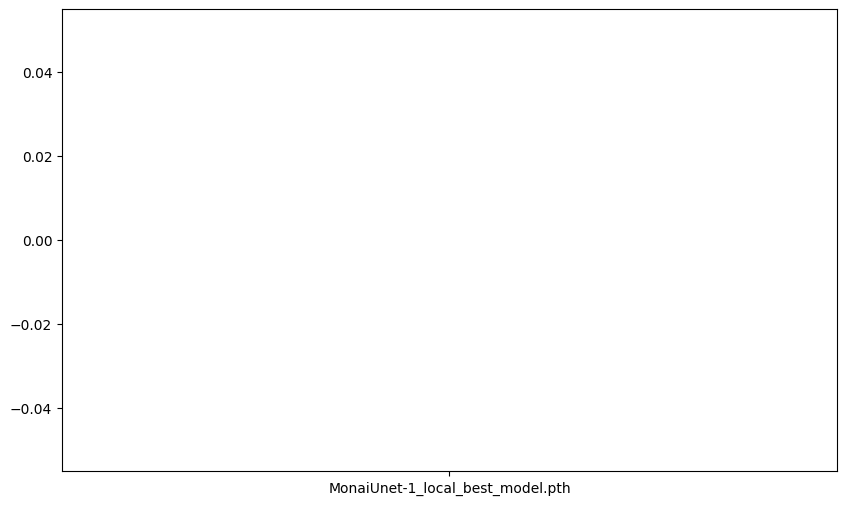

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a boxplot of prediction times for each model using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='time', data=df)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time Comparison')
plt.show()

# Calculate average prediction time and accuracy for each model
#model_summary = df.groupby('model_name').agg({'dice_metric': 'mean', 'time': 'mean'}).reset_index()
print("Model Summary:")
#print(model_summary)


In [75]:
# Calculate the median of 'dice_metric' for each 'model_name'
medians = df.groupby('model_name')['dice_metric'].median()
filtered_model_names = medians[medians > 0.5].index
filtered_model_names = filtered_model_names.tolist()
filtered_model_names.append('thresholding')
filtered_model_names = pd.Index(filtered_model_names)
filtered_df = df[df['model_name'].isin(filtered_model_names)]

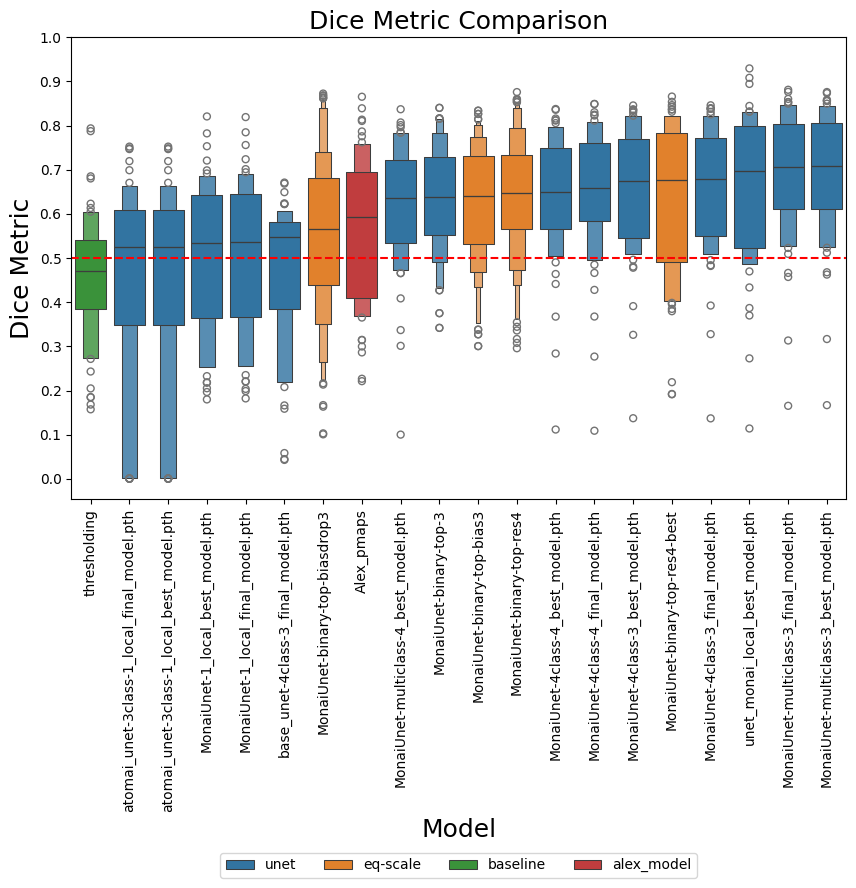

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#df.dropna(subset=['dice_metric'], inplace=True)

# Calculate the mean of 'dice_metric' for each 'model_name' and sort
sorted_model_names = filtered_df.groupby('model_name')['dice_metric'].median().sort_values().index

# Create a boxplot of prediction times for each model using Seaborn
plt.figure(figsize=(10, 6))
boxen_plot = sns.boxenplot(x='model_name', y='dice_metric', hue='model_type', data=filtered_df, order=sorted_model_names)
plt.axhline(0.5, color='r', linestyle='--')
plt.xlabel('Model', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Dice Metric', fontsize=18)
plt.title('Dice Metric Comparison', fontsize=18)

# Move legend to the top center with one row
handles, labels = boxen_plot.get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -.75))  # Adjust ncol if needed

plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

In [7]:
# Calculate the median of 'dice_metric' for each 'model_name'
medians = df.groupby('model_name')['dice_metric'].median()

filtered_model_names = medians[medians > 0.5].index
filtered_df = df[df['model_name'].isin(filtered_model_names)]
filtered_df

,model_name,position,dice_metric,iou_metric,time,image,model_type
0,../results/MonaiUnet-1_local_best_model.pth,0,0.617553,0.630405,31.628241,NaN,unet
1,../results/MonaiUnet-1_local_best_model.pth,1,0.534399,0.589517,31.628241,NaN,unet
2,../results/MonaiUnet-1_local_best_model.pth,2,0.538221,0.213399,31.628241,NaN,unet
3,../results/MonaiUnet-1_local_best_model.pth,3,0.488893,0.569829,31.628241,NaN,unet
4,../results/MonaiUnet-1_local_best_model.pth,4,0.820740,0.268588,31.628241,NaN,unet
...,...,...,...,...,...,...,...
418,MonaiUnet-binary-top-bias3,42,0.327264,0.176015,74.685059,NaN,eq-scale
419,MonaiUnet-binary-top-bias3,43,0.568885,0.415079,74.685059,NaN,eq-scale
420,MonaiUnet-binary-top-bias3,44,0.583642,0.433585,74.685059,NaN,eq-scale
421,MonaiUnet-binary-top-bias3,45,0.550869,0.335143,74.685059,NaN,eq-scale


In [55]:
filtered_df['model_name'].unique()

array(['MonaiUnet-1_local_best_model.pth',
       'MonaiUnet-4class-4_best_model.pth',
       'MonaiUnet-1_local_final_model.pth',
       'MonaiUnet-4class-3_best_model.pth',
       'base_unet-4class-3_final_model.pth',
       'MonaiUnet-multiclass-4_best_model.pth',
       'MonaiUnet-multiclass-3_final_model.pth',
       'MonaiUnet-multiclass-3_best_model.pth',
       'unet_monai_local_best_model.pth',
       'atomai_unet-3class-1_local_best_model.pth',
       'MonaiUnet-4class-3_final_model.pth',
       'MonaiUnet-4class-4_final_model.pth',
       'atomai_unet-3class-1_local_final_model.pth',
       'MonaiUnet-binary-top-3', 'MonaiUnet-binary-top-res4',
       'MonaiUnet-binary-top-biasdrop3', 'MonaiUnet-binary-top-bias3',
       'thresholding'], dtype=object)

In [65]:
# Calculate the median of 'dice_metric' for each 'model_name'
subset=['MonaiUnet-binary-top-biasdrop3', 'MonaiUnet-binary-top-res4', 'MonaiUnet-binary-top-bias3',]
filtered_df = df[df['model_name'].isin(subset)]
filtered_df

,model_name,position,dice_metric,iou_metric,time,image,model_type
564,MonaiUnet-binary-top-res4,0,0.813722,0.736184,240.364609,NaN,eq-scale
565,MonaiUnet-binary-top-res4,1,0.751185,0.615085,240.364609,NaN,eq-scale
566,MonaiUnet-binary-top-res4,2,0.833768,0.756676,240.364609,NaN,eq-scale
567,MonaiUnet-binary-top-res4,3,0.733746,0.640885,240.364609,NaN,eq-scale
568,MonaiUnet-binary-top-res4,4,0.857185,0.744077,240.364609,NaN,eq-scale
...,...,...,...,...,...,...,...
418,MonaiUnet-binary-top-bias3,42,0.327264,0.176015,74.685059,NaN,eq-scale
419,MonaiUnet-binary-top-bias3,43,0.568885,0.415079,74.685059,NaN,eq-scale
420,MonaiUnet-binary-top-bias3,44,0.583642,0.433585,74.685059,NaN,eq-scale
421,MonaiUnet-binary-top-bias3,45,0.550869,0.335143,74.685059,NaN,eq-scale


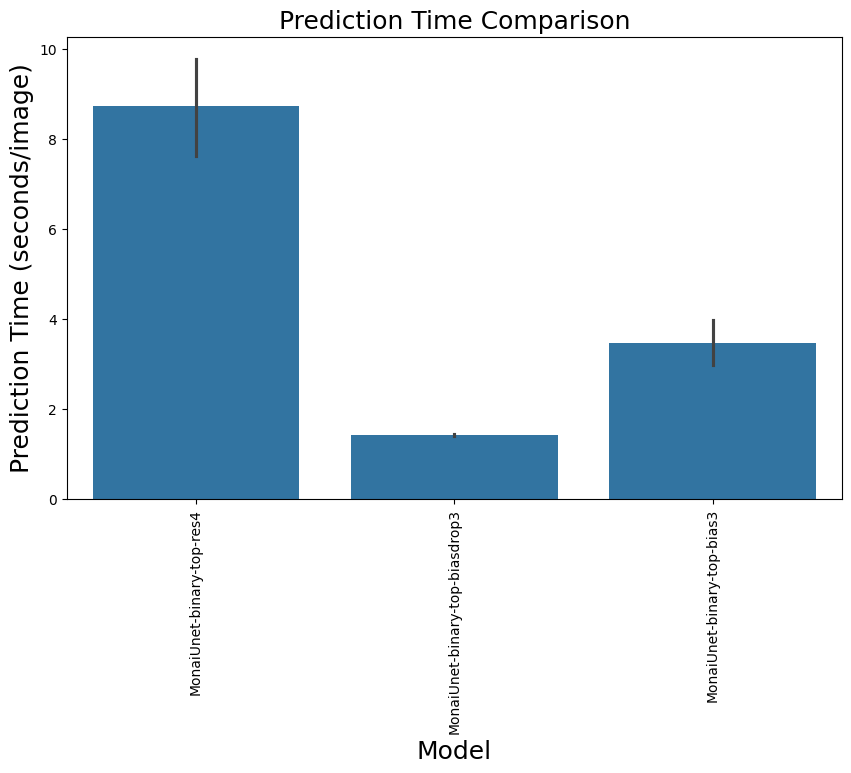

Model Summary:


In [66]:
# Drop duplicates in 'model_name' column
#filtered_df = filtered_df.drop_duplicates(subset='model_name')
filtered_df = filtered_df.dropna(subset=['time'])
filtered_df['time_adjusted']=filtered_df['time']/52
# Now create the boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='time_adjusted', data=filtered_df)
plt.xlabel('Model', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Prediction Time (seconds/image)', fontsize=18)
plt.title('Prediction Time Comparison', fontsize=18)

plt.show()

print("Model Summary:")

In [78]:
# Calculate the median of 'dice_metric' for each 'model_name'
medians = df.groupby('model_name')['dice_metric'].median()

# Get the 'model_name' values where the median is above 0.5
model_names_above_05 = medians[medians >= 0.5].index

# Select only the rows in df where 'model_name' is in model_names_above_05
df = df[df['model_name'].isin(model_names_above_05)]


In [79]:
df

,model_name,position,dice_metric,iou_metric,time,image,model_type
0,../results/MonaiUnet-1_local_best_model.pth,0.0,0.617553,0.630405,31.628241,NaN,unet
1,../results/MonaiUnet-1_local_best_model.pth,1.0,0.534399,0.589517,31.628241,NaN,unet
2,../results/MonaiUnet-1_local_best_model.pth,2.0,0.538221,0.213399,31.628241,NaN,unet
3,../results/MonaiUnet-1_local_best_model.pth,3.0,0.488893,0.569829,31.628241,NaN,unet
4,../results/MonaiUnet-1_local_best_model.pth,4.0,0.820740,0.268588,31.628241,NaN,unet
...,...,...,...,...,...,...,...
418,MonaiUnet-binary-top-bias3,42.0,0.327264,0.176015,74.685059,NaN,eq-scale
419,MonaiUnet-binary-top-bias3,43.0,0.568885,0.415079,74.685059,NaN,eq-scale
420,MonaiUnet-binary-top-bias3,44.0,0.583642,0.433585,74.685059,NaN,eq-scale
421,MonaiUnet-binary-top-bias3,45.0,0.550869,0.335143,74.685059,NaN,eq-scale


In [80]:
# Sort the DataFrame by 'dice_metric'
df_sorted = df.sort_values('dice_metric')

# Get the last 20 rows
df_last_20 = df_sorted.head(20)
df_last_20

,model_name,position,dice_metric,iou_metric,time,image,model_type
2483,../results/atomai_unet-3class-1_local_final_mo...,39.0,0.000070,0.008695,26.927212,NaN,unet
2060,../results/atomai_unet-3class-1_local_best_mod...,39.0,0.000070,0.008695,26.908058,NaN,unet
2490,../results/atomai_unet-3class-1_local_final_mo...,46.0,0.000181,0.004974,26.927212,NaN,unet
2067,../results/atomai_unet-3class-1_local_best_mod...,46.0,0.000181,0.004974,26.908058,NaN,unet
2061,../results/atomai_unet-3class-1_local_best_mod...,40.0,0.000637,0.027834,26.908058,NaN,unet
2484,../results/atomai_unet-3class-1_local_final_mo...,40.0,0.000637,0.027834,26.927212,NaN,unet
2058,../results/atomai_unet-3class-1_local_best_mod...,37.0,0.000660,0.026002,26.908058,NaN,unet
2481,../results/atomai_unet-3class-1_local_final_mo...,37.0,0.000660,0.026002,26.927212,NaN,unet
2478,../results/atomai_unet-3class-1_local_final_mo...,34.0,0.000662,0.026823,26.927212,NaN,unet
2055,../results/atomai_unet-3class-1_local_best_mod...,34.0,0.000662,0.026823,26.908058,NaN,unet


In [81]:
# Filter the DataFrame for the specific model
df_model = df[df['model_name'] == 'MonaiUnet-binary-top-res4']

# Sort by 'dice_metric' and get the bottom values
df_model_sorted = df_model.sort_values('dice_metric')
bottom_values = df_model_sorted.head(20)  # Change 20 to the number of bottom values you want
bottom_values

,model_name,position,dice_metric,iou_metric,time,image,model_type
589,MonaiUnet-binary-top-res4,25.0,0.295752,0.250684,240.364609,NaN,eq-scale
25,MonaiUnet-binary-top-res4,25.0,0.307829,0.284512,192.630921,NaN,eq-scale
213,MonaiUnet-binary-top-res4,25.0,0.316697,0.299689,236.665095,NaN,eq-scale
794,MonaiUnet-binary-top-res4,42.0,0.336010,0.179386,1146.561549,NaN,eq-scale
587,MonaiUnet-binary-top-res4,23.0,0.344295,0.242681,240.364609,NaN,eq-scale
606,MonaiUnet-binary-top-res4,42.0,0.354657,0.207114,240.364609,NaN,eq-scale
798,MonaiUnet-binary-top-res4,46.0,0.363350,0.148577,1146.561549,NaN,eq-scale
770,MonaiUnet-binary-top-res4,18.0,0.370880,0.166860,1146.561549,NaN,eq-scale
585,MonaiUnet-binary-top-res4,21.0,0.418007,0.344818,240.364609,NaN,eq-scale
588,MonaiUnet-binary-top-res4,24.0,0.420221,0.392643,240.364609,NaN,eq-scale


In [82]:
# Filter the DataFrame for the specific model
df_model = df[df['model_name'] == 'MonaiUnet-binary-top-res4']

# Sort by 'dice_metric' and get the bottom values
df_model_sorted = df_model.sort_values('dice_metric')
bottom_values = df_model_sorted.head(20)  # Change 20 to the number of bottom values you want
bottom_values

,model_name,position,dice_metric,iou_metric,time,image,model_type
589,MonaiUnet-binary-top-res4,25.0,0.295752,0.250684,240.364609,NaN,eq-scale
25,MonaiUnet-binary-top-res4,25.0,0.307829,0.284512,192.630921,NaN,eq-scale
213,MonaiUnet-binary-top-res4,25.0,0.316697,0.299689,236.665095,NaN,eq-scale
794,MonaiUnet-binary-top-res4,42.0,0.336010,0.179386,1146.561549,NaN,eq-scale
587,MonaiUnet-binary-top-res4,23.0,0.344295,0.242681,240.364609,NaN,eq-scale
606,MonaiUnet-binary-top-res4,42.0,0.354657,0.207114,240.364609,NaN,eq-scale
798,MonaiUnet-binary-top-res4,46.0,0.363350,0.148577,1146.561549,NaN,eq-scale
770,MonaiUnet-binary-top-res4,18.0,0.370880,0.166860,1146.561549,NaN,eq-scale
585,MonaiUnet-binary-top-res4,21.0,0.418007,0.344818,240.364609,NaN,eq-scale
588,MonaiUnet-binary-top-res4,24.0,0.420221,0.392643,240.364609,NaN,eq-scale


In [83]:
# Filter the DataFrame for the specific model
df_model = df[df['model_name'] == '../results/MonaiUnet-4class-3_best_model.pth']

# Sort by 'dice_metric' and get the bottom values
df_model_sorted = df_model.sort_values('dice_metric')
bottom_values = df_model_sorted.head(20)  # Change 20 to the number of bottom values you want
bottom_values


,model_name,position,dice_metric,iou_metric,time,image,model_type
892,../results/MonaiUnet-4class-3_best_model.pth,46.0,0.137244,0.025103,35.794006,NaN,unet
848,../results/MonaiUnet-4class-3_best_model.pth,2.0,0.326137,0.128826,35.794006,NaN,unet
885,../results/MonaiUnet-4class-3_best_model.pth,39.0,0.391117,0.137329,35.794006,NaN,unet
871,../results/MonaiUnet-4class-3_best_model.pth,25.0,0.478141,0.508149,35.794006,NaN,unet
883,../results/MonaiUnet-4class-3_best_model.pth,37.0,0.480677,0.415561,35.794006,NaN,unet
888,../results/MonaiUnet-4class-3_best_model.pth,42.0,0.496182,0.190418,35.794006,NaN,unet
884,../results/MonaiUnet-4class-3_best_model.pth,38.0,0.512206,0.388228,35.794006,NaN,unet
891,../results/MonaiUnet-4class-3_best_model.pth,45.0,0.521148,0.248615,35.794006,NaN,unet
878,../results/MonaiUnet-4class-3_best_model.pth,32.0,0.524505,0.376391,35.794006,NaN,unet
869,../results/MonaiUnet-4class-3_best_model.pth,23.0,0.529779,0.188428,35.794006,NaN,unet


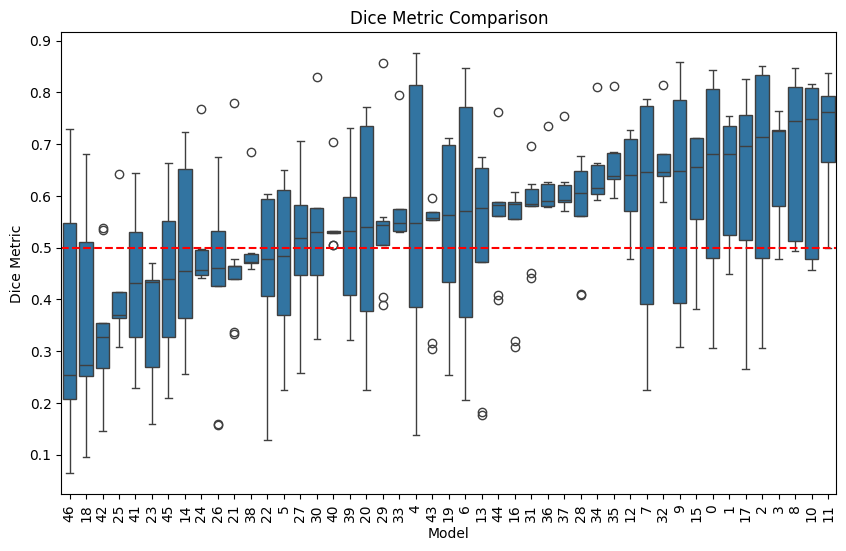

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

df6.dropna(subset=['dice_metric'], inplace=True)

# Calculate the mean of 'dice_metric' for each 'model_name' and sort
sorted_model_names = df6.groupby('position')['dice_metric'].median().sort_values().index


# Create a boxplot of prediction times for each model using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='position', y='dice_metric', data=df6, order=sorted_model_names)
plt.axhline(0.5, color = 'r', linestyle='--')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Dice Metric')
plt.title('Dice Metric Comparison')
plt.show()

In [90]:
df6['model_name'].unique()

array(['MonaiUnet-binary-top-res4', 'MonaiUnet-binary-top-biasdrop.3-3',
       'MonaiUnet-binary-top-biasdrop3',
       'MonaiUnet-binary-top-bias.drop.1-4', 'MonaiUnet-binary-top-bias3'],
      dtype=object)